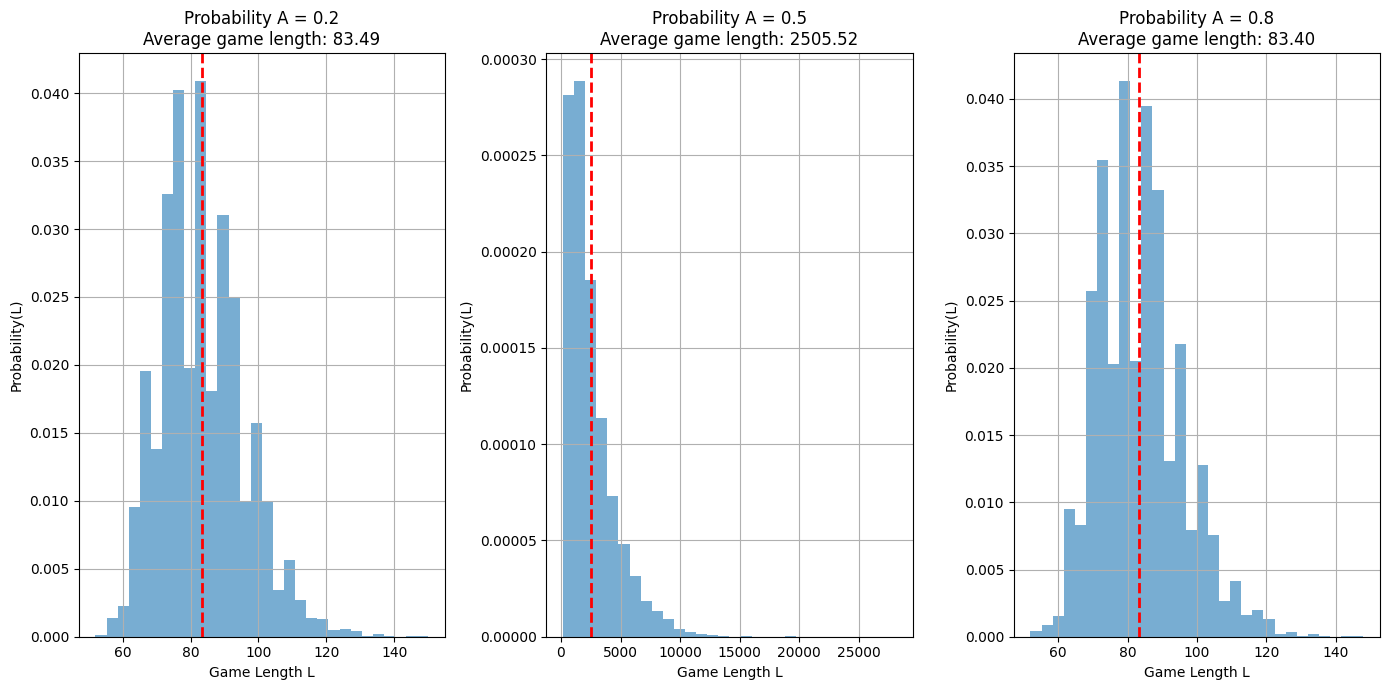

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_game_length(capital_a, capital_b, probability_a):
    game_length = 0
    while capital_a > 0 and capital_b > 0:
        game_length += 1
        if random.random() < probability_a:
            capital_b -= 1
            capital_a += 1
        else:
            capital_a -= 1
            capital_b += 1
    return game_length

probabilities_a = [1/5, 1/2, 4/5]
number_of_simulations = 10000
results = {p: [] for p in probabilities_a}

for p in probabilities_a:
    for _ in range(number_of_simulations):
        length = simulate_game_length(50, 50, p)
        results[p].append(length)

average_lengths = {p: np.mean(results[p]) for p in probabilities_a}

plt.figure(figsize=(14, 7))

for i, p in enumerate(probabilities_a, 1):
    plt.subplot(1, len(probabilities_a), i)
    plt.hist(results[p], bins=30, density=True, alpha=0.6)
    plt.axvline(average_lengths[p], color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Probability A = {p}\nAverage game length: {average_lengths[p]:.2f}')
    plt.xlabel('Game Length L')
    plt.ylabel('Probability(L)')
    plt.grid(True)

plt.tight_layout()
plt.show()
